# Constructing a 3D ensemble of the phage T4 lysozyme (T4L) protein

* **The Goal**:
    * Generate a 3D ensemble of the T4 lysozyme (T4L) protein. 
    * **The Input files are**:
        * Experimental chemical shifts: ```data/proteins/measured_shifts.dat```
        * Computed (simulated) chemical shifts: ```data/proteins/computed_shifts.dat```
            * The computed chemical shifts were estimated from 3D coordinates of 12 simulated structures of T4L using the tool [Larmor$^{C\alpha}$](https://pubs.acs.org/doi/10.1021/ct5009125).
        * Chemical shift uncertainity: ```data/proteins/uncertainity.dat```
        * Structures:
            * All native X-ray structure (PDBID: 3DMV)[https://www.rcsb.org/structure/3DMV] of the native T4L: ```data/proteins/3dmv_all_atom.pdb and 3dmv_coarse_grained.pdb``` (only CA atoms)
            * Coarsed native structure of the native T4L: ```data/proteins/3dmv_coarse_grained.pdb``` (only CA atoms)
            * Simulated structures: ```data/proteins/model_[1-12].pdb```
            
* **Tasks**:
    1. Read in chemical shift data and output BME-formatted files.
    2. Determine the best $\theta$ value to use for BME reweighting.
    3. For the best $\theta$ value, plot or list the weights of each conformer.

* **Question**:
    * How did you choose $\theta$?
    * How does the **highest** weighted structure compare to the native T4L structure? If not similar, what are some possible reasons. For this analysis you will have to use a molecular viewer should as [PyMOL](https://pymol.org/2/) or [VMD](https://www.ks.uiuc.edu/Research/vmd/) or [Chimera](https://www.cgl.ucsf.edu/chimera/) or [NGLView](https://github.com/nglviewer/nglview) to view and compare the structures (see above).

## Get BME code

In [1]:
%%capture
!git clone https://github.com/sbottaro/BME.git
import BME.bme_reweight as bme

## Other required imports

In [2]:
%%capture
import pandas as pd
import numpy as np
from reweighting import *

## 1. Read in chemical shift data and output BME-formatted files

Hint: see ```write_BME_chemical_shifts()```

In [3]:
# add code here
BME_formatted_chemical_shift_data = write_BME_chemical_shifts(input_exp ="data/proteins/measured_shifts.dat",
                                                                input_sim = "data/proteins/computed_shifts.dat",
                                                                input_accuracy = "data/proteins/uncertainity.dat",
                                                                output_name_exp = "data/proteins/bme_experimental_3DMV.dat",
                                                                output_name_sim = "data/proteins/bme_simulated_3DMV.dat")
BME_formatted_chemical_shift_data

(     DATA=JCOUPLINGS  PRIOR=GAUSS
 0             170.20     0.808655
 1              53.30     0.778733
 2               3.73     0.214649
 3             174.30     0.808655
 4              51.70     0.778733
 ..               ...          ...
 626           173.70     0.808655
 627            54.00     0.778733
 628             4.53     0.214649
 629           116.70     2.090146
 630           125.60     2.090146
 
 [631 rows x 2 columns],
         0        1        2        3        4        5        6        7    \
 0   173.974  54.8117  4.57656  175.344  52.3487  8.29216  4.70015  121.502   
 1   173.124  54.9402  4.43071  175.383  52.7002  8.37718  4.72798  121.822   
 2   173.220  54.8955  4.56086  175.366  52.1150  8.35061  4.77651  122.378   
 3   173.370  54.9024  4.68031  175.164  52.3100  8.38804  4.75204  121.638   
 4   173.323  55.0335  4.40849  173.795  52.8141  8.32317  4.59892  121.722   
 5   173.578  54.9762  4.47087  174.748  52.2695  8.45143  4.69293  121.825   


## 2. Determine the best $\theta$ value to use for BME reweighting.
Use files generated above to carry out BME analysis

Hint: see ```find_weights()```

In [4]:
import math
    
chi2_after_list = []
srel_list = []
for theta in list(range(1,100)):
    try:
        calculated_weight_chi2_srel= find_weights(exp_file="data/proteins/bme_experimental_3DMV.dat",
                                        sim_file="data/proteins/bme_simulated_3DMV.dat",
                                        theta=theta)
        chi2_after_list.append(calculated_weight_chi2_srel[2])
        srel_list.append(calculated_weight_chi2_srel[3])
    except:
        chi2_after_list.append(math.inf)
        srel_list.append(math.inf)
        
best_theta_with_min_chi2_after = chi2_after_list.index(min(chi2_after_list)) + 1

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# ERROR - Minimization failed. Perhaps theta is too small, or there is some bug.
# exit message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in sim

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                  445=1.2330e+02 is larger than maximum value in simulation 1.2075e+02
# Warning: expt average                  446=1.7660e+02 is larger than maximum value in simulation 1.7631e+02
# Warning: expt average                  447=6.7200e+01 is larger than maximum value in simulation 6.6687e+01
# Warning: expt average                  448=3.6700e+00 is smaller than minimum value in simulation 3.9862e+00
# Warning: expt average                  450=1.1910e+02 is larger than maximum value in simulation 1.1883e+02
# Warning: expt average                  455=1.2010e+02 is larger than maximum value in simulation 1.2000e+02
# Warning: expt average                  460=1.7840e+02 is larger than maximum value in simulation 1.7828e+02
# Warning: expt average                  461=5.9000e+01 is larger than maximum value in simulation 5.8504e+01
# Warning: expt average                  462=3.9700e+00 is smaller than minimum value in simulation 4.0437e+00
# Warnin

# Warning: expt average                  574=1.7850e+02 is larger than maximum value in simulation 1.7838e+02
# Warning: expt average                  575=6.7500e+01 is larger than maximum value in simulation 6.5344e+01
# Warning: expt average                  579=6.7400e+01 is larger than maximum value in simulation 6.6299e+01
# Warning: expt average                  580=3.9400e+00 is smaller than minimum value in simulation 3.9956e+00
# Warning: expt average                  581=1.1740e+02 is larger than maximum value in simulation 1.1582e+02
# Warning: expt average                  582=1.7690e+02 is larger than maximum value in simulation 1.7680e+02
# Warning: expt average                  583=6.7400e+01 is larger than maximum value in simulation 6.5777e+01
# Warning: expt average                  584=3.9800e+00 is smaller than minimum value in simulation 4.0012e+00
# Warning: expt average                  585=1.2250e+02 is larger than maximum value in simulation 1.1595e+02
# Warnin

# ERROR - Minimization failed. Perhaps theta is too small, or there is some bug.
# exit message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in sim

# ERROR - Minimization failed. Perhaps theta is too small, or there is some bug.
# exit message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in sim

# Warning: expt average                  570=1.7850e+02 is larger than maximum value in simulation 1.7840e+02
# Warning: expt average                  571=6.8300e+01 is larger than maximum value in simulation 6.6652e+01
# Warning: expt average                  572=3.3900e+00 is smaller than minimum value in simulation 3.5250e+00
# Warning: expt average                  573=1.2500e+02 is larger than maximum value in simulation 1.2019e+02
# Warning: expt average                  574=1.7850e+02 is larger than maximum value in simulation 1.7838e+02
# Warning: expt average                  575=6.7500e+01 is larger than maximum value in simulation 6.5344e+01
# Warning: expt average                  579=6.7400e+01 is larger than maximum value in simulation 6.6299e+01
# Warning: expt average                  580=3.9400e+00 is smaller than minimum value in simulation 3.9956e+00
# Warning: expt average                  581=1.1740e+02 is larger than maximum value in simulation 1.1582e+02
# Warnin

# ERROR - Minimization failed. Perhaps theta is too small, or there is some bug.
# exit message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in sim

# Warning: expt average                  167=1.1710e+02 is smaller than minimum value in simulation 1.1763e+02
# Warning: expt average                  168=1.7800e+02 is larger than maximum value in simulation 1.7670e+02
# Warning: expt average                  171=1.1380e+02 is smaller than minimum value in simulation 1.1396e+02
# Warning: expt average                  172=1.7940e+02 is larger than maximum value in simulation 1.7903e+02
# Warning: expt average                  179=1.2270e+02 is larger than maximum value in simulation 1.2056e+02
# Warning: expt average                  180=1.8100e+02 is larger than maximum value in simulation 1.7824e+02
# Warning: expt average                  181=5.7300e+01 is larger than maximum value in simulation 5.7007e+01
# Warning: expt average                  182=4.7800e+00 is larger than maximum value in simulation 4.6047e+00
# Warning: expt average                  183=1.2020e+02 is larger than maximum value in simulation 1.1959e+02
# Warnin

# Warning: expt average                  207=1.1540e+02 is smaller than minimum value in simulation 1.1887e+02
# Warning: expt average                  208=1.7730e+02 is larger than maximum value in simulation 1.7499e+02
# Warning: expt average                  209=6.3700e+01 is larger than maximum value in simulation 6.2045e+01
# Warning: expt average                  211=1.1960e+02 is larger than maximum value in simulation 1.1677e+02
# Warning: expt average                  212=1.7580e+02 is larger than maximum value in simulation 1.7551e+02
# Warning: expt average                  216=1.7210e+02 is smaller than minimum value in simulation 1.7398e+02
# Warning: expt average                  217=4.6100e+01 is larger than maximum value in simulation 4.5995e+01
# Warning: expt average                  218=3.7300e+00 is smaller than minimum value in simulation 4.0518e+00
# Warning: expt average                  219=1.0290e+02 is smaller than minimum value in simulation 1.0840e+02
# Warn

# ERROR - Minimization failed. Perhaps theta is too small, or there is some bug.
# exit message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in sim

# ERROR - Minimization failed. Perhaps theta is too small, or there is some bug.
# exit message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in sim

# ERROR - Minimization failed. Perhaps theta is too small, or there is some bug.
# exit message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in sim

# exp data: (631, 2)
# calc data: (12, 631)
# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger th

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                  187=1.2090e+02 is larger than maximum value in simulation 1.1990e+02
# Warning: expt average                  188=1.7950e+02 is larger than maximum value in simulation 1.7853e+02
# Warning: expt average                  189=5.4400e+01 is larger than maximum value in simulation 5.4266e+01
# Warning: expt average                  192=1.7730e+02 is larger than maximum value in simulation 1.7692e+02
# Warning: expt average                  193=5.9000e+01 is smaller than minimum value in simulation 6.1019e+01
# Warning: expt average                  196=1.7370e+02 is smaller than minimum value in simulation 1.7400e+02
# Warning: expt average                  198=3.9700e+00 is smaller than minimum value in simulation 4.1090e+00
# Warning: expt average                  200=1.7230e+02 is smaller than minimum value in simulation 1.7466e+02
# Warning: expt average                  201=5.3900e+01 is smaller than minimum value in simulation 5.4377e+01
# War

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                  192=1.7730e+02 is larger than maximum value in simulation 1.7692e+02
# Warning: expt average                  193=5.9000e+01 is smaller than minimum value in simulation 6.1019e+01
# Warning: expt average                  196=1.7370e+02 is smaller than minimum value in simulation 1.7400e+02
# Warning: expt average                  198=3.9700e+00 is smaller than minimum value in simulation 4.1090e+00
# Warning: expt average                  200=1.7230e+02 is smaller than minimum value in simulation 1.7466e+02
# Warning: expt average                  201=5.3900e+01 is smaller than minimum value in simulation 5.4377e+01
# Warning: expt average                  202=4.5700e+00 is larger than maximum value in simulation 4.5266e+00
# Warning: expt average                  203=1.1550e+02 is smaller than minimum value in simulation 1.1658e+02
# Warning: expt average                  204=1.7540e+02 is larger than maximum value in simulation 1.7528e+02
# Wa

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                   55=1.2720e+02 is larger than maximum value in simulation 1.2455e+02
# Warning: expt average                   56=1.7370e+02 is smaller than minimum value in simulation 1.7599e+02
# Warning: expt average                   57=5.4400e+01 is smaller than minimum value in simulation 5.4739e+01
# Warning: expt average                   58=4.3700e+00 is larger than maximum value in simulation 4.3054e+00
# Warning: expt average                   61=5.3600e+01 is smaller than minimum value in simulation 5.4456e+01
# Warning: expt average                   62=5.4200e+00 is larger than maximum value in simulation 4.5411e+00
# Warning: expt average                   63=1.1500e+02 is smaller than minimum value in simulation 1.1714e+02
# Warning: expt average                   64=1.7480e+02 is smaller than minimum value in simulation 1.7531e+02
# Warning: expt average                   65=6.3900e+01 is larger than maximum value in simulation 6.1800e+01
# War

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                   64=1.7480e+02 is smaller than minimum value in simulation 1.7531e+02
# Warning: expt average                   65=6.3900e+01 is larger than maximum value in simulation 6.1800e+01
# Warning: expt average                   66=4.1300e+00 is smaller than minimum value in simulation 4.1318e+00
# Warning: expt average                   68=1.7270e+02 is smaller than minimum value in simulation 1.7339e+02
# Warning: expt average                   69=5.5300e+01 is smaller than minimum value in simulation 5.6227e+01
# Warning: expt average                   70=5.1100e+00 is larger than maximum value in simulation 4.8563e+00
# Warning: expt average                   71=1.2770e+02 is larger than maximum value in simulation 1.2281e+02
# Warning: expt average                   76=1.7810e+02 is larger than maximum value in simulation 1.7679e+02
# Warning: expt average                   77=5.2700e+01 is smaller than minimum value in simulation 5.2993e+01
# War

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

## 3. For the best $\theta$ value, plot or list the weights of each conformer.

In [9]:
# add code here

weight_chi2_srel_with_best_theta = find_weights(exp_file="data/proteins/bme_experimental_3DMV.dat",
                                        sim_file="data/proteins/bme_simulated_3DMV.dat",
                                        theta=best_theta_with_min_chi2_after)

# Warning: expt average                    0=1.7020e+02 is smaller than minimum value in simulation 1.7298e+02
# Warning: expt average                    1=5.3300e+01 is smaller than minimum value in simulation 5.4796e+01
# Warning: expt average                    2=3.7300e+00 is smaller than minimum value in simulation 4.4085e+00
# Warning: expt average                    4=5.1700e+01 is smaller than minimum value in simulation 5.2102e+01
# Warning: expt average                    5=6.8800e+00 is smaller than minimum value in simulation 8.2682e+00
# Warning: expt average                    6=4.2800e+00 is smaller than minimum value in simulation 4.5680e+00
# Warning: expt average                    7=1.1570e+02 is smaller than minimum value in simulation 1.2137e+02
# Warning: expt average                    8=1.7490e+02 is smaller than minimum value in simulation 1.7653e+02
# Warning: expt average                    9=6.4100e+01 is larger than maximum value in simulation 6.4085e+01
# 

In [18]:
print(f'weights_with_best_theta: {weight_chi2_srel_with_best_theta[0]}')
print(f'chi2_before: {weight_chi2_srel_with_best_theta[1]}')
print(f'chi2_after: {weight_chi2_srel_with_best_theta[2]}')
print(f'srel: {weight_chi2_srel_with_best_theta[3]}')



weights_with_best_theta: [9.99996807e-01 1.09480107e-29 3.52367206e-38 9.10452134e-25
 4.35755428e-24 2.27668709e-18 1.11060422e-21 4.49975857e-13
 3.05862492e-25 5.85390244e-46 2.35994016e-16 3.19342790e-06]
chi2_before: 3.408985401590958
chi2_after: 2.093503170607995
srel: -2.484863045388036


## **Question**:
1) How did you choose $\theta$?

2) How does the **highest** weighted structure compare to the native T4L structure? If not similar, what are some possible reasons.

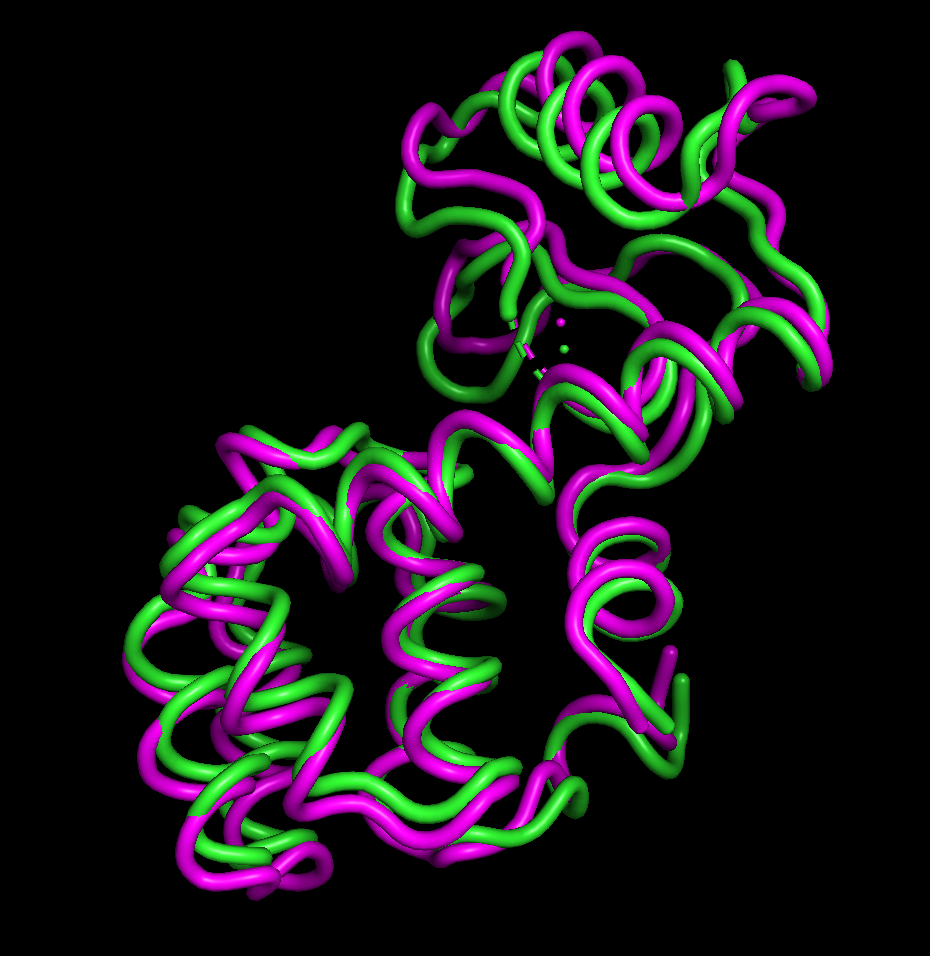

In [1]:
from IPython.display import Image
Image(filename='T4L_3D.png') 

### Answer to 1): numbers from 1 to 100 as well as exp_file and sim_file were feeded to find_weights() function. Then, theta that gives the smallest chi2_after was selected as the best theta.

### Answer to 2): model_1 (magenta) is the highest weighted structure and model_1 turnes out to be a great structural agreement with the native T4L structure (green).

Add response here